In [4]:
# Cell 1: Install headless Chromium, chromedriver, and Python deps
# Note: This works in Colab but requires time to install each session.
# Run this cell first in your Colab notebook.

# System packages (apt-get may take ~30-60s)
!apt-get update -qq
!apt-get install -y -qq chromium-browser chromium-chromedriver

# Python packages
!pip install -q selenium pytest pytest-html

# Show versions to help debugging
import sys, subprocess
print("Python:", sys.version.splitlines()[0])
!chromium-browser --version
!chromedriver --version
import selenium
print("Selenium version:", selenium.__version__)


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Preconfiguring packages ...
Selecting previously unselected package apparmor.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../apparmor_3.0.4-2ubuntu2.4_amd64.deb ...
Unpacking apparmor (3.0.4-2ubuntu2.4) ...
Selecting previously unselected package squashfs-tools.
Preparing to unpack .../squashfs-tools_1%3a4.5-3build1_amd64.deb ...
Unpacking squashfs-tools (1:4.5-3build1) ...
Preparing to unpack .../libudev1_249.11-0ubuntu3.17_amd64.deb ...
Unpacking libudev1:amd64 (249.11-0ubuntu3.17) over (249.11-0ubuntu3.12) ...
Setting up libudev1:amd64 (249.11-0ubuntu3.17) ...
Selecting previously unselected package udev.
(Reading database ... 126875 files and directories currently installed.)
Preparing to unpack .../udev_249.11-0ubuntu3.17_amd64.deb ...
Unpacking 

In [13]:
# ✅ Cell 2: Create the test script file in Colab (practice site version)
test_code = r"""
import os
import pytest
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ Use the real login page for practice
LOGIN_URL = "https://practicetestautomation.com/practice-test-login/"

# ✅ Valid credentials for this demo site
VALID_USERNAME = "student"
VALID_PASSWORD = "Password123"
INVALID_USERNAME = "wronguser"
INVALID_PASSWORD = "wrongpass"

@pytest.fixture(scope='module')
def driver():
    # Configure Chrome to run in headless mode (no UI)
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.binary_location = "/usr/bin/chromium-browser"

    driver = webdriver.Chrome(options=chrome_options)
    driver.implicitly_wait(5)
    yield driver
    driver.quit()

def attempt_login(driver, username, password):
    # Open the login page
    driver.get(LOGIN_URL)

    # Locate the username, password, and login button elements
    username_field = driver.find_element(By.ID, "username")
    password_field = driver.find_element(By.ID, "password")
    login_button = driver.find_element(By.ID, "submit")

    # Clear and input new credentials
    username_field.clear()
    username_field.send_keys(username)
    password_field.clear()
    password_field.send_keys(password)

    # Click the login button
    login_button.click()

def test_valid_login(driver):
    # Attempt login using valid credentials
    attempt_login(driver, VALID_USERNAME, VALID_PASSWORD)

    # Wait for success message
    success_message = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//h1[text()='Logged In Successfully']"))
    )

    assert success_message.is_displayed(), "Valid login failed!"

def test_invalid_login(driver):
    # Attempt login using invalid credentials
    attempt_login(driver, INVALID_USERNAME, INVALID_PASSWORD)

    # Wait for error message
    error_message = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "error"))
    )

    assert error_message.is_displayed(), "Error message not shown for invalid login!"
"""

# ✅ Write the file into your Colab working directory
with open("test_login.py", "w") as f:
    f.write(test_code)

print("✅ Wrote test_login.py successfully — ready to run!")


✅ Wrote test_login.py successfully — ready to run!


In [14]:
# Cell 3: show the test file contents (so you can verify selectors)
!sed -n '1,240p' test_login.py



import os
import pytest
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ✅ Use the real login page for practice
LOGIN_URL = "https://practicetestautomation.com/practice-test-login/"

# ✅ Valid credentials for this demo site
VALID_USERNAME = "student"
VALID_PASSWORD = "Password123"
INVALID_USERNAME = "wronguser"
INVALID_PASSWORD = "wrongpass"

@pytest.fixture(scope='module')
def driver():
    # Configure Chrome to run in headless mode (no UI)
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.binary_location = "/usr/bin/chromium-browser"

    driver = webdriver.Chrome(options=chrome_options)
    driver.implicitly_wait(5)
    yield drive

In [25]:
def test_invalid_login(driver):
    # Attempt login using invalid credentials
    attempt_login(driver, INVALID_USERNAME, INVALID_PASSWORD)

    # Wait for the visible error message to appear
    error_message = WebDriverWait(driver, 10).until(
        EC.visibility_of_element_located((By.ID, "error"))
    )

    # Verify the correct error text is displayed
    assert "Your username is invalid!" in error_message.text, "Error message text not found!"


In [21]:
!pip install pytest-json-report


In [19]:
# Cell 5: list files and offer download links
!ls -la

# If running inside Colab, you can use the files module to download or use the left Files panel.
from google.colab import files
if os.path.exists('report.html'):
    print("Download report.html:")
    files.download('report.html')

if os.path.exists('results.json'):
    print("Download results.json:")
    files.download('results.json')


total 68
drwxr-xr-x 1 root root  4096 Oct 24 14:39 .
drwxr-xr-x 1 root root  4096 Oct 24 14:29 ..
drwxr-xr-x 4 root root  4096 Oct 22 13:38 .config
drwx------ 5 root root  4096 Oct 24 14:21 drive
drwxr-xr-x 2 root root  4096 Oct 24 14:54 __pycache__
drwxr-xr-x 3 root root  4096 Oct 24 14:39 .pytest_cache
-rw-r--r-- 1 root root 33570 Oct 24 14:55 report.html
drwxr-xr-x 1 root root  4096 Oct 22 13:39 sample_data
-rw-r--r-- 1 root root  2348 Oct 24 14:53 test_login.py
Download report.html:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from google.colab import files
files.download("report.html")
files.download("results.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

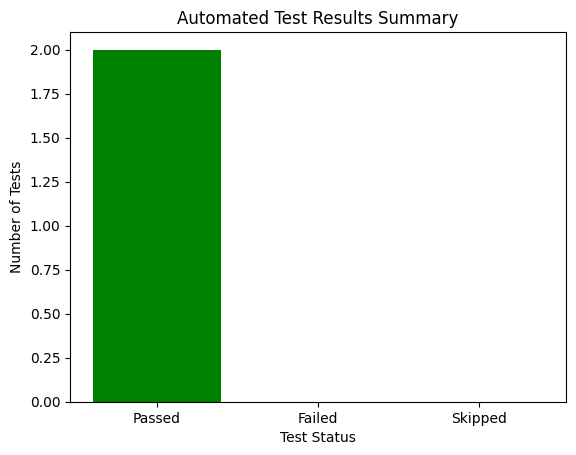

In [29]:
plt.bar(labels, values, color=['green','red','orange'])
plt.title("Automated Test Results Summary")
plt.xlabel("Test Status")
plt.ylabel("Number of Tests")
plt.show()
